In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import streamlit as st
import pickle

In [4]:
warnings.filterwarnings('ignore')
from numpy import argmax 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
     

In [5]:
df_train = pd.read_csv("D:\\NIKHIL JAISWAR\\ASSINGMENT\\Logistic Regression\\Titanic_train.csv")
df_test = pd.read_csv("D:\\NIKHIL JAISWAR\\ASSINGMENT\\Logistic Regression\\Titanic_test.csv")

In [6]:
print(df_train.head())
print(df_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [7]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
print('Training dataset data types:','\n',df_train.dtypes)
print('Testing dataset data types:','\n',df_test.dtypes)


Training dataset data types: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Testing dataset data types: 
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
print('Training dataset Stats:','\n',df_train.describe())
print('Testing dataset Stats:','\n',df_test.describe())

Training dataset Stats: 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Testing dataset Stats: 
        PassengerId      Pclass

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
df_train.duplicated().sum()
df_train[df_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
df_test.duplicated().sum()
df_test[df_test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
age_mean = df_train['Age'].mean()
age_mean

29.69911764705882

In [16]:
df_train['Age'] = df_train['Age'].fillna(age_mean)

In [18]:
df_train['Age'].isnull().sum()

0

In [19]:
df_train['Cabin'].value_counts().sort_values(ascending=False)

Cabin
B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
              ..
D6             1
B82 B84        1
A36            1
B69            1
C148           1
Name: count, Length: 147, dtype: int64

In [20]:
df_train['Cabin'].isnull().sum()/len(df_train['Cabin'])*100

77.10437710437711

In [21]:
df_train = df_train.drop(['Cabin'], axis=1)

In [22]:
df_train['Embarked'].value_counts().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
embarked_mode = df_train['Embarked'].mode()[0]
embarked_mode

'S'

In [24]:
df_train['Embarked'] = df_train['Embarked'].fillna(embarked_mode)

In [25]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
test_age_mean = df_test['Age'].mean()
test_age_mean

30.272590361445783

In [27]:
df_test['Age'] = df_test['Age'].fillna(test_age_mean)

In [28]:
df_test['Age'].isnull().sum()

0

In [29]:
df_test['Fare'] = df_test['Fare'].fillna(test_age_mean)

In [30]:
df_test['Fare'].isnull().sum()

0

In [31]:
df_test = df_test.drop(['Cabin'], axis=1)

In [32]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


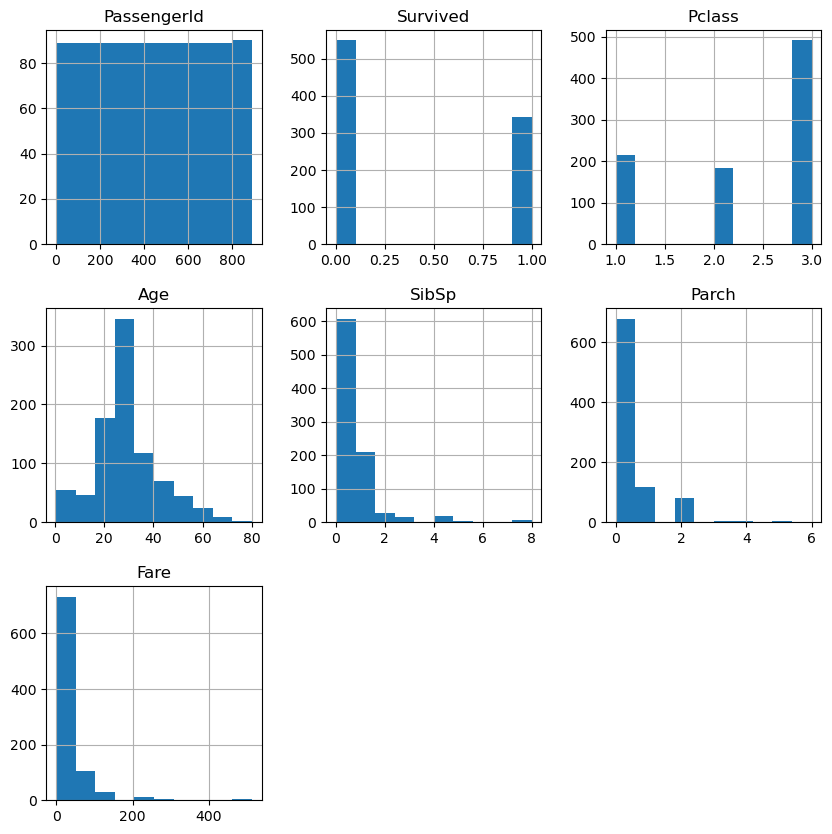

In [34]:
df_train.hist(figsize=(10,10))
plt.show()

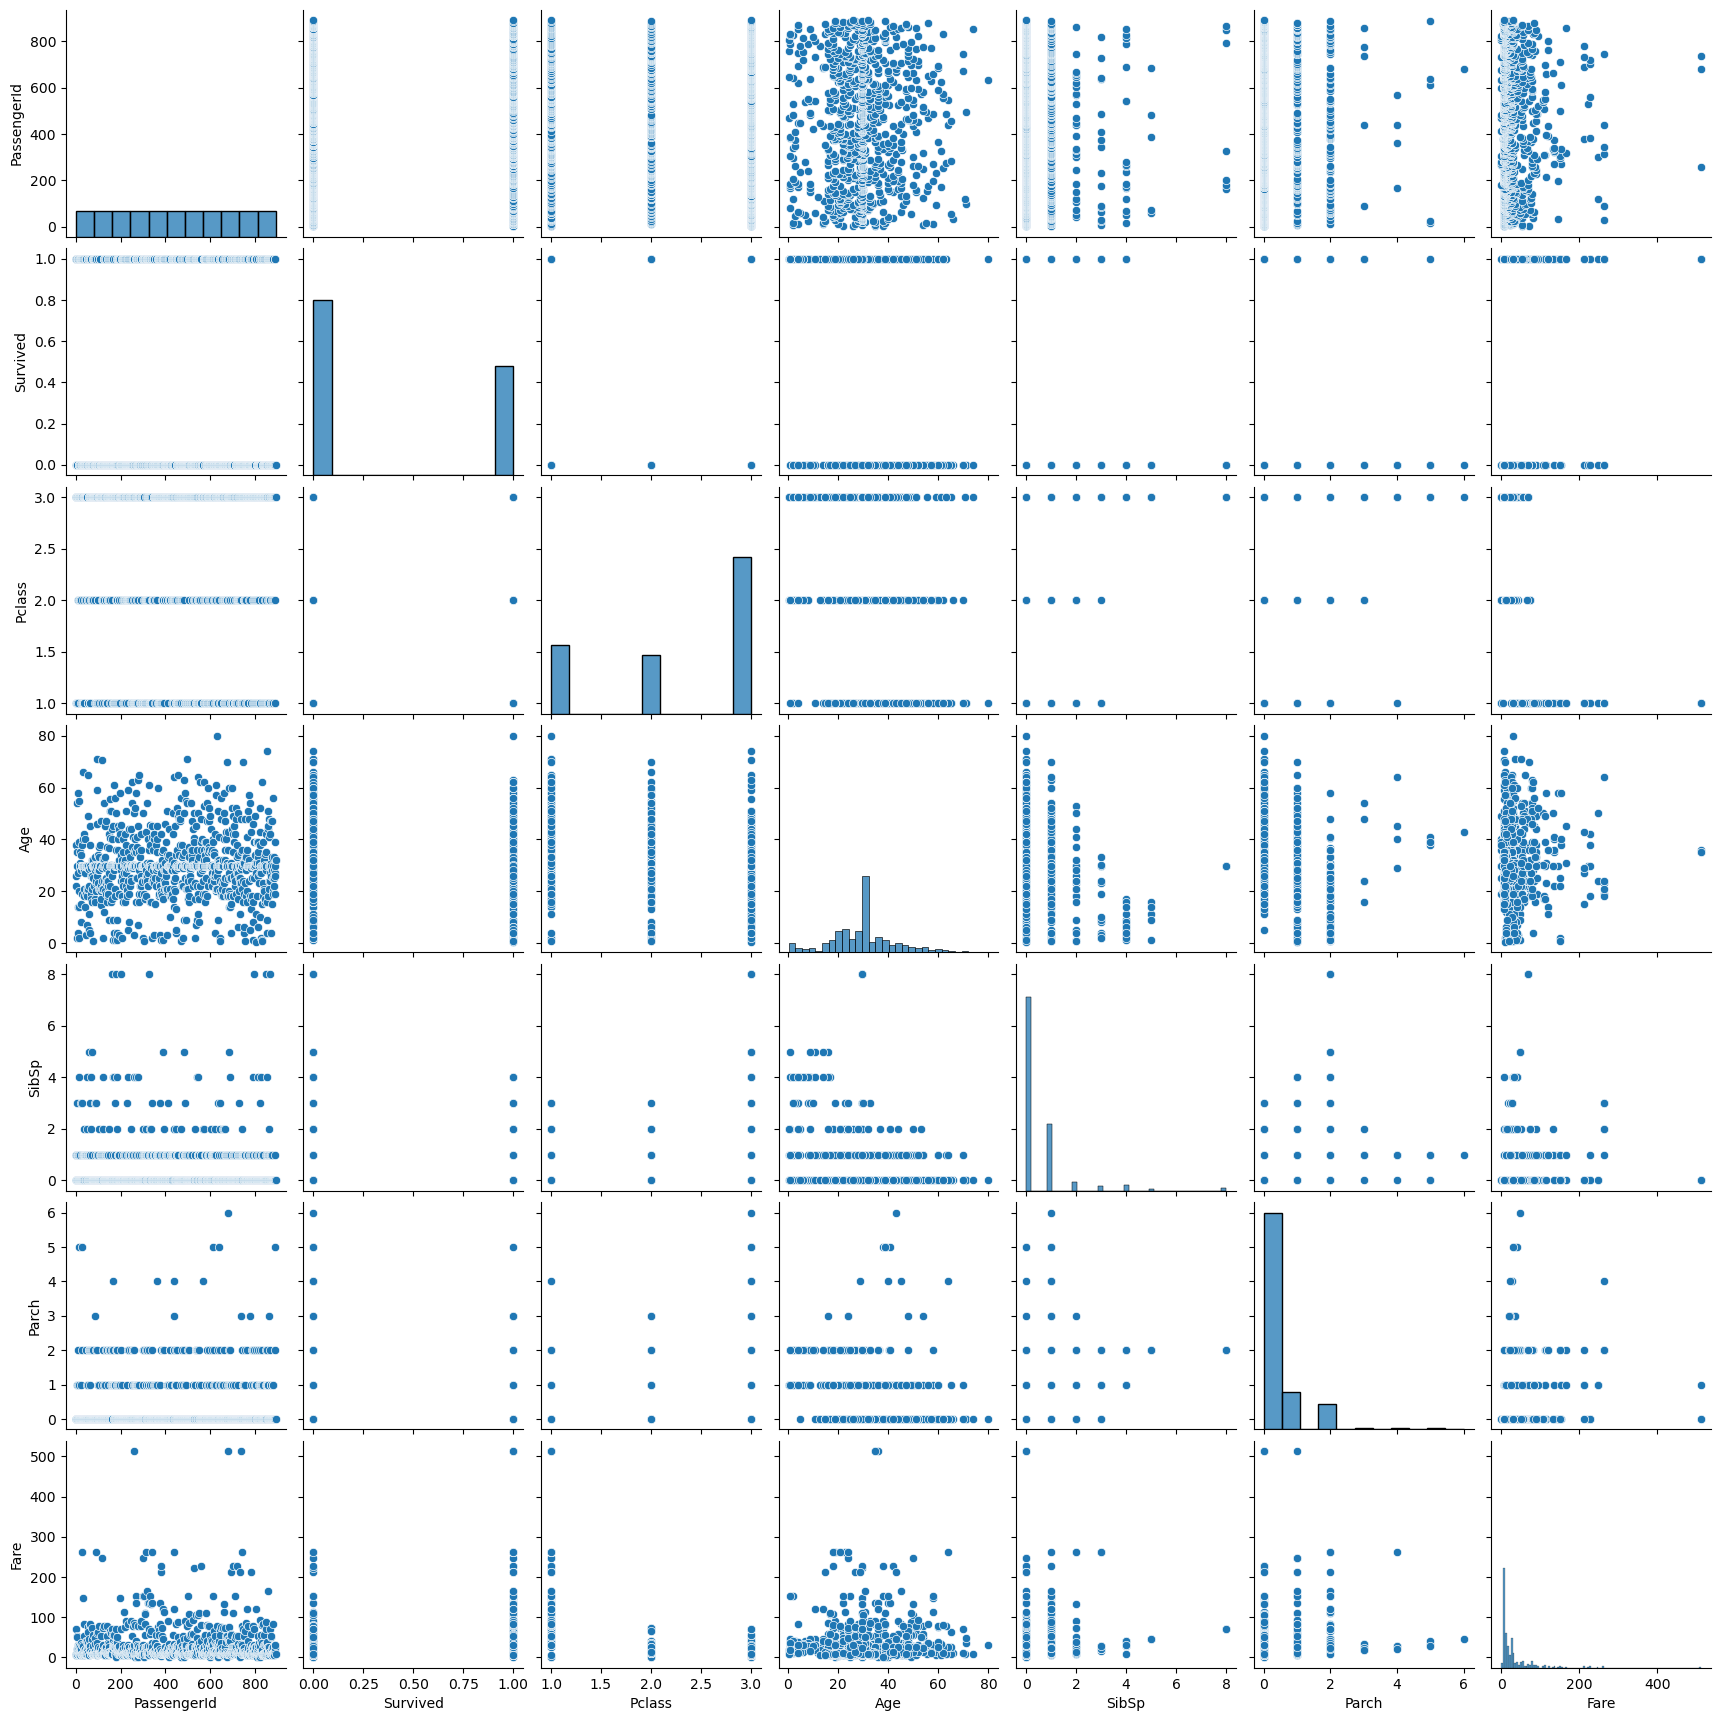

In [35]:
sb.pairplot(df_train)

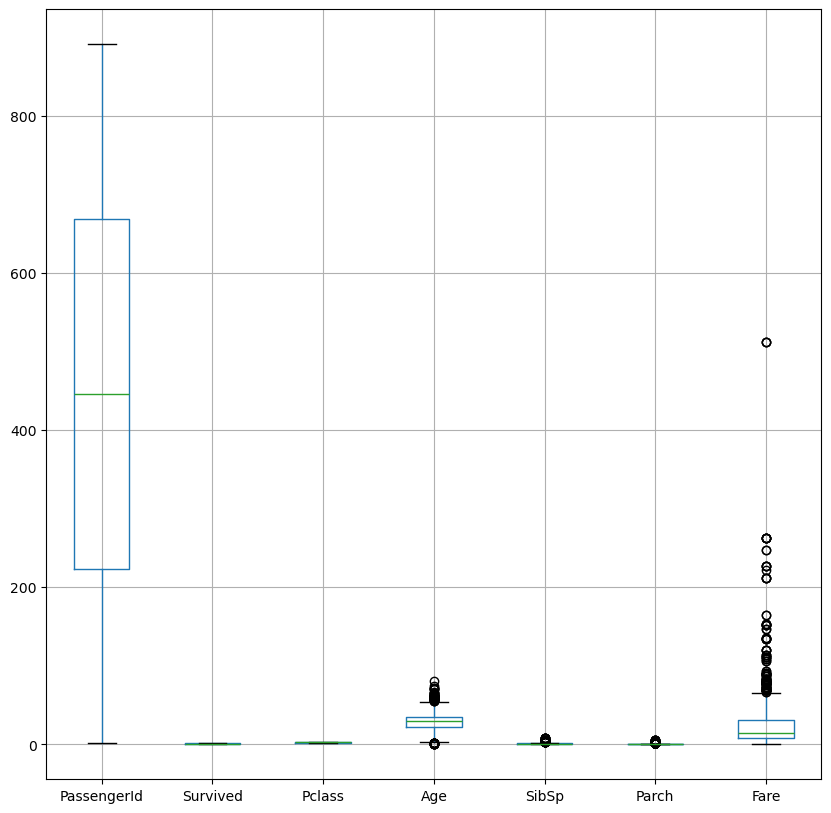

In [36]:
df_train.boxplot(figsize=(10,10))
plt.show()

# Dropping columns that dont help in predictions

In [37]:
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)
df_test = df_test.drop(['PassengerId','Name','Ticket'], axis=1)

In [38]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [39]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [40]:
df_test.dtypes, df_train.dtypes

(Pclass        int64
 Sex          object
 Age         float64
 SibSp         int64
 Parch         int64
 Fare        float64
 Embarked     object
 dtype: object,
 Survived      int64
 Pclass        int64
 Sex          object
 Age         float64
 SibSp         int64
 Parch         int64
 Fare        float64
 Embarked     object
 dtype: object)

In [41]:
# Before treating the outlier we need to encode the categorical columns
# Combine the datasets to ensure consistent Label encoding
df_combined = pd.concat([df_train, df_test],keys=['train', 'test'])
# Keys are used to differentiate the obs based on their original dataset
# This is done so that it becomes easier to seperate the datasets again later

# Perform Label encoding on the categorical columns
LE = preprocessing.LabelEncoder()
df_combined['Sex'] = LE.fit_transform(df_combined['Sex'])
df_combined['Embarked'] = LE.fit_transform(df_combined['Embarked'])

# Split the combined dataset back into training and testing sets using the keys
df_train = df_combined.loc['train']
df_test = df_combined.loc['test']

In [42]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.000000,1,0,7.2500,2
1,1.0,1,0,38.000000,1,0,71.2833,0
2,1.0,3,0,26.000000,0,0,7.9250,2
3,1.0,1,0,35.000000,1,0,53.1000,2
4,0.0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0.0,2,1,27.000000,0,0,13.0000,2
887,1.0,1,0,19.000000,0,0,30.0000,2
888,0.0,3,0,29.699118,1,2,23.4500,2
889,1.0,1,1,26.000000,0,0,30.0000,0


In [43]:
df_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,NaN,3,1,34.50000,0,0,7.8292,1
1,NaN,3,0,47.00000,1,0,7.0000,2
2,NaN,2,1,62.00000,0,0,9.6875,1
3,NaN,3,1,27.00000,0,0,8.6625,2
4,NaN,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,NaN,3,1,30.27259,0,0,8.0500,2
414,NaN,1,0,39.00000,0,0,108.9000,0
415,NaN,3,1,38.50000,0,0,7.2500,2
416,NaN,3,1,30.27259,0,0,8.0500,2


In [46]:
 # Data type conversion

In [44]:
df_train['Survived'] = df_train['Survived'].astype('int')
df_train['Age'] = df_train['Age'].astype('int')
df_test['Age'] = df_test['Age'].astype('int')
     

In [47]:
 # Outlier treatment

In [49]:
Q3 = df_train.quantile(0.75,numeric_only=True)
Q1 = df_train.quantile(0.25,numeric_only=True)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[~((df_train < lower_bound) | (df_train > upper_bound)).any(axis=1)]

df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
5,0,3,1,29,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
884,0,3,1,25,0,0,7.0500,2
886,0,2,1,27,0,0,13.0000,2
887,1,1,0,19,0,0,30.0000,2
889,1,1,1,26,0,0,30.0000,0


In [50]:
# Model Building

In [51]:
df_test = df_test.drop(['Survived'], axis=1)

In [53]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,1
1,3,0,47,1,0,7.0000,2
2,2,1,62,0,0,9.6875,1
3,3,1,27,0,0,8.6625,2
4,3,0,22,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30,0,0,8.0500,2
414,1,0,39,0,0,108.9000,0
415,3,1,38,0,0,7.2500,2
416,3,1,30,0,0,8.0500,2


In [54]:
x_train = df_train.drop(['Survived'], axis=1) # Independant variables
y_train = df_train['Survived']
x_test = df_test

x_train_split,x_val_test,y_train_split,y_val_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train_split,y_train_split)

LogisticRegression()

In [55]:
y_train_pred = model.predict(x_val_test)
y_train_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [58]:
y_train_pred_prob = model.predict_proba(x_val_test)
y_train_pred_prob

array([[0.68367578, 0.31632422],
       [0.40501552, 0.59498448],
       [0.38854176, 0.61145824],
       [0.86617683, 0.13382317],
       [0.87471688, 0.12528312],
       [0.40501552, 0.59498448],
       [0.92426829, 0.07573171],
       [0.31350131, 0.68649869],
       [0.88159842, 0.11840158],
       [0.89777523, 0.10222477],
       [0.66223744, 0.33776256],
       [0.91965715, 0.08034285],
       [0.87082286, 0.12917714],
       [0.72679112, 0.27320888],
       [0.3259692 , 0.6740308 ],
       [0.39116031, 0.60883969],
       [0.31995212, 0.68004788],
       [0.27105825, 0.72894175],
       [0.86942536, 0.13057464],
       [0.82677258, 0.17322742],
       [0.3225069 , 0.6774931 ],
       [0.89114047, 0.10885953],
       [0.89832096, 0.10167904],
       [0.85302191, 0.14697809],
       [0.88574206, 0.11425794],
       [0.8887038 , 0.1112962 ],
       [0.89048072, 0.10951928],
       [0.90252269, 0.09747731],
       [0.068549  , 0.931451  ],
       [0.8515468 , 0.1484532 ],
       [0.

In [57]:
matrix = confusion_matrix(y_val_test,y_train_pred)
matrix

array([[76, 11],
       [10, 19]], dtype=int64)

In [60]:
print('Classification report: ','\n',classification_report(y_val_test,y_train_pred))

Classification report:  
               precision    recall  f1-score   support

           0       0.88      0.87      0.88        87
           1       0.63      0.66      0.64        29

    accuracy                           0.82       116
   macro avg       0.76      0.76      0.76       116
weighted avg       0.82      0.82      0.82       116



In [61]:
acc = accuracy_score(y_val_test,y_train_pred)
acc

0.8189655172413793

In [62]:
error = 1 - acc
error

0.18103448275862066

In [63]:
recall = recall_score(y_val_test, y_train_pred)
recall

0.6551724137931034

In [64]:
precision = precision_score(y_val_test, y_train_pred)
precision

0.6333333333333333

In [65]:
f1 = f1_score(y_val_test, y_train_pred)
f1

0.6440677966101694

In [66]:
roc_auc = roc_auc_score(y_val_test, y_train_pred)
roc_auc

0.7643678160919541

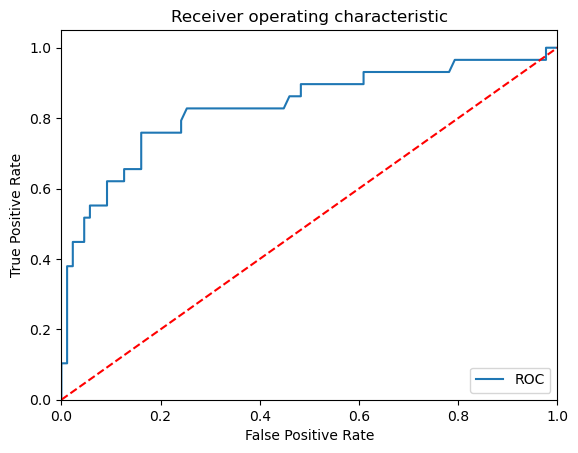

In [67]:
fpr, tpr, thresholds = roc_curve(y_val_test, y_train_pred_prob[:,1])
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1],'r--') # plotting the dummy classification model in red -- line
plt.xlim([0.0, 1.0]) # set some x-axis limits
plt.ylim([0.0, 1.05]) # setting some y-axis limits
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [68]:
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

    Feature  Coefficient
0    Pclass    -0.334539
1       Sex    -2.610769
2       Age    -0.011717
3     SibSp    -0.658041
4     Parch     0.000000
5      Fare     0.049341
6  Embarked    -0.229426


In [69]:
test_pred= model.predict(x_test)
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [70]:
df_test['Survived'] = test_pred
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34,0,0,7.8292,1,0
1,3,0,47,1,0,7.0000,2,0
2,2,1,62,0,0,9.6875,1,0
3,3,1,27,0,0,8.6625,2,0
4,3,0,22,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...
413,3,1,30,0,0,8.0500,2,0
414,1,0,39,0,0,108.9000,0,1
415,3,1,38,0,0,7.2500,2,0
416,3,1,30,0,0,8.0500,2,0


In [71]:
# Deployment

In [72]:
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the trained model
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Create a Streamlit app
st.title('Titanic Survival Prediction App')

def user_input_features():
    pclass = st.sidebar.selectbox('Passenger Class', [1, 2, 3])
    sex = st.sidebar.selectbox('Sex', ['male', 'female'])
    age = st.number_input('Age', min_value=0, max_value=80)
    fare = st.number_input('Fare', min_value=0, max_value=500)
    sibsp = st.number_input('Siblings/Spouses Aboard', min_value=0, max_value=8)
    parch = st.number_input('Parents/Children Aboard', min_value=0, max_value=8)
    data = {'Pclass': [pclass],
            'Sex': [sex],
            'Age': [age],
            'Fare': [fare],
            'SibSp': [sibsp],
            'Parch': [parch]}
    features = pd.DataFrame(data, index=[0])
    return features

# Encode categorical variables
def encode_features(df):
    df_encoded = df.copy()
    df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
    return df_encoded

df = user_input_features()
encoded_df = encode_features(df)

# Ensure columns match the training data
expected_columns = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
for col in expected_columns:
    if col not in encoded_df.columns:
        encoded_df[col] = 0

# Reorder columns to match the training set
encoded_df = encoded_df[expected_columns]

# Predict
if st.button('Predict'):
    prediction = model.predict(encoded_df)
    if prediction[0] == 1:
        st.write('The passenger is predicted to survive.')
    else:
        st.write('The passenger is predicted not to survive.')

2024-08-03 22:35:10.480 
  command:

    streamlit run C:\Users\NIKHIL JAISWAR\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
